In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [2]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, SeparableConvolution2D, SeparableConv2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 2s 0us/step


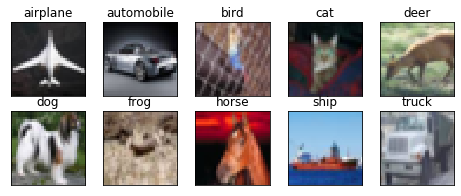

In [4]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)


In [8]:
# Define the model
# "out" stands for: size of output and "R" stands for: Size of Reptive Field

model = Sequential()

model.add(SeparableConv2D(48, 3, 3, activation= 'relu', border_mode='same',depthwise_initializer ='he_uniform', input_shape=(32, 32, 3))) # out: 32*32*48 and  R:3
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(SeparableConv2D(48, 3, 3, depthwise_initializer ='he_uniform', activation= 'relu')) # out: 30*30*48 and  R:5
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(MaxPooling2D(pool_size=(2, 2))) #out: 15*15*48 and R:6
model.add(Dropout(0.1))

model.add(SeparableConv2D(96, 3, 3, depthwise_initializer ='he_uniform', border_mode='same', activation= 'relu')) #out: 15*15*96 and R:10
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(SeparableConv2D(96, 3, 3, depthwise_initializer ='he_uniform', activation= 'relu')) #13*13*96 and R:14
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(MaxPooling2D(pool_size=(2, 2))) # out: 6*6*96 and R:16
model.add(Dropout(0.1))

model.add(SeparableConv2D(192, 3, 3, depthwise_initializer ='he_uniform', activation= 'relu', border_mode='same')) #out: 6*6*192 and R:24
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(SeparableConv2D(192, 3, 3, depthwise_initializer ='he_uniform', activation= 'relu')) #out: 4*4*192 and R:32
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(MaxPooling2D(pool_size=(2, 2))) #out: 2*2*192 and R:36
model.add(Dropout(0.1))


model.add(SeparableConv2D(64, 2, 2, depthwise_initializer ='he_uniform', activation= 'relu', border_mode='same'))# out: 2*2*64 and R:44
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(32, 2, 2, depthwise_initializer ='he_uniform', activation= 'relu')) #out: 1*1*32 and R:52
model.add(BatchNormalization())
model.add(Dropout(0.1))



model.add(Convolution2D(num_classes, 1, 1)) #out: 1*1*10 and R:52
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(48, (3, 3), activation="relu", depthwise_initializer="he_uniform", input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(48, (3, 3), depthwise_initializer="he_uniform", activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3), depthwise_initializer="he_uniform", activation="relu", padding="same")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3), depthwise_init

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_1 (Separabl (None, 32, 32, 48)        219       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 48)        192       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 48)        0         
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 30, 30, 48)        2784      
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 48)        192       
_________________________________________________________________
dropout_2 (Dropout)          (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)       

In [9]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model_info = model.fit(train_features, train_labels, batch_size=32, epochs=50, verbose=1, validation_data=(test_features, test_labels), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 50000 samples, validate on 10000 samples
Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
50000/50000 [==============================] - 60s 1ms/step - loss: 1.6235 - acc: 0.4219 - val_loss: 1.2651 - val_acc: 0.5545
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
50000/50000 [==============================] - 54s 1ms/step - loss: 1.2691 - acc: 0.5552 - val_loss: 1.1085 - val_acc: 0.6140
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
50000/50000 [==============================] - 53s 1ms/step - loss: 1.1266 - acc: 0.6094 - val_loss: 0.9137 - val_acc: 0.6873
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
50000/50000 [==============================] - 53s 1ms/step - loss: 1.0376 - acc: 0.6428 - val_loss: 0.9149 - val_acc: 0.6922
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
50000/50000 [==========

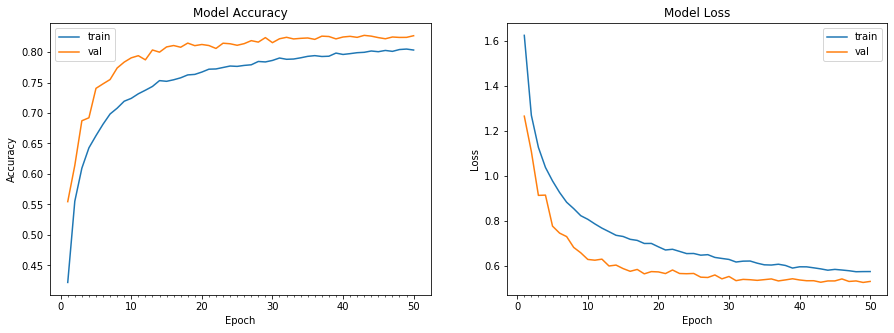

Accuracy on test data is: 82.69


In [10]:
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))